In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from vbgmm import VariationalGaussianMixture,\
                  cluster_number_selection_by_kl

## load dataset

In [2]:
x = np.loadtxt('./data.txt')
N, D = x.shape
K = 3
x.shape

(1300, 2)

## make dataset

In [2]:
N = 1000
D = 2
K = 3
x, _ = make_blobs(n_samples=1000, n_features=D, centers=K,
                  cluster_std=[1.0, 0.5, 1.2], center_box=(-5, 5),
                  random_state=1)

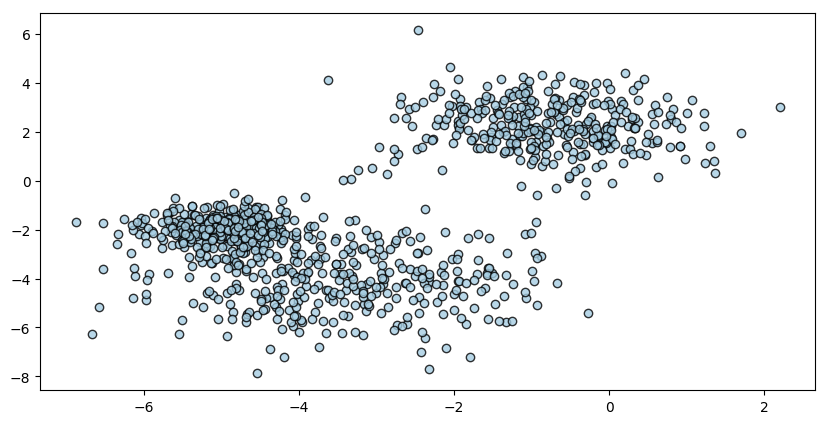

In [3]:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(x[:,0], x[:,1], c=plt.cm.Paired(0), edgecolor='black', alpha=.8)
plt.show()

In [4]:
vgm = VariationalGaussianMixture(N, K, D, x)
vgm.fit(print_diff=False)

# iterations: 50
w: [0.3343254  0.35615079 0.30952381]
means: [[-0.81691677  2.22757037]
 [-4.95631465 -2.01154495]
 [-3.38891128 -4.15940727]]
covs: [[[1.02596067 0.02683718]
  [0.02683718 1.21035898]]

 [[0.33158311 0.03828423]
  [0.03828423 0.35637097]]

 [[1.59513377 0.14874801]
  [0.14874801 1.65755577]]]


$D_M = \sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})} = 1$

$\Sigma = VWV^T$

$V = [\boldsymbol{v}_1, \boldsymbol{v}_2]$,
$W = \left[
\begin{array}{cc}
  \lambda_1 & 0\\
  0 & \lambda_2
\end{array}
\right]
$

major axis $= \sqrt{\lambda_1}\boldsymbol{v}_1$

minor axis $= \sqrt{\lambda_2}\boldsymbol{v}_2$

KL: 2535.2131089819113


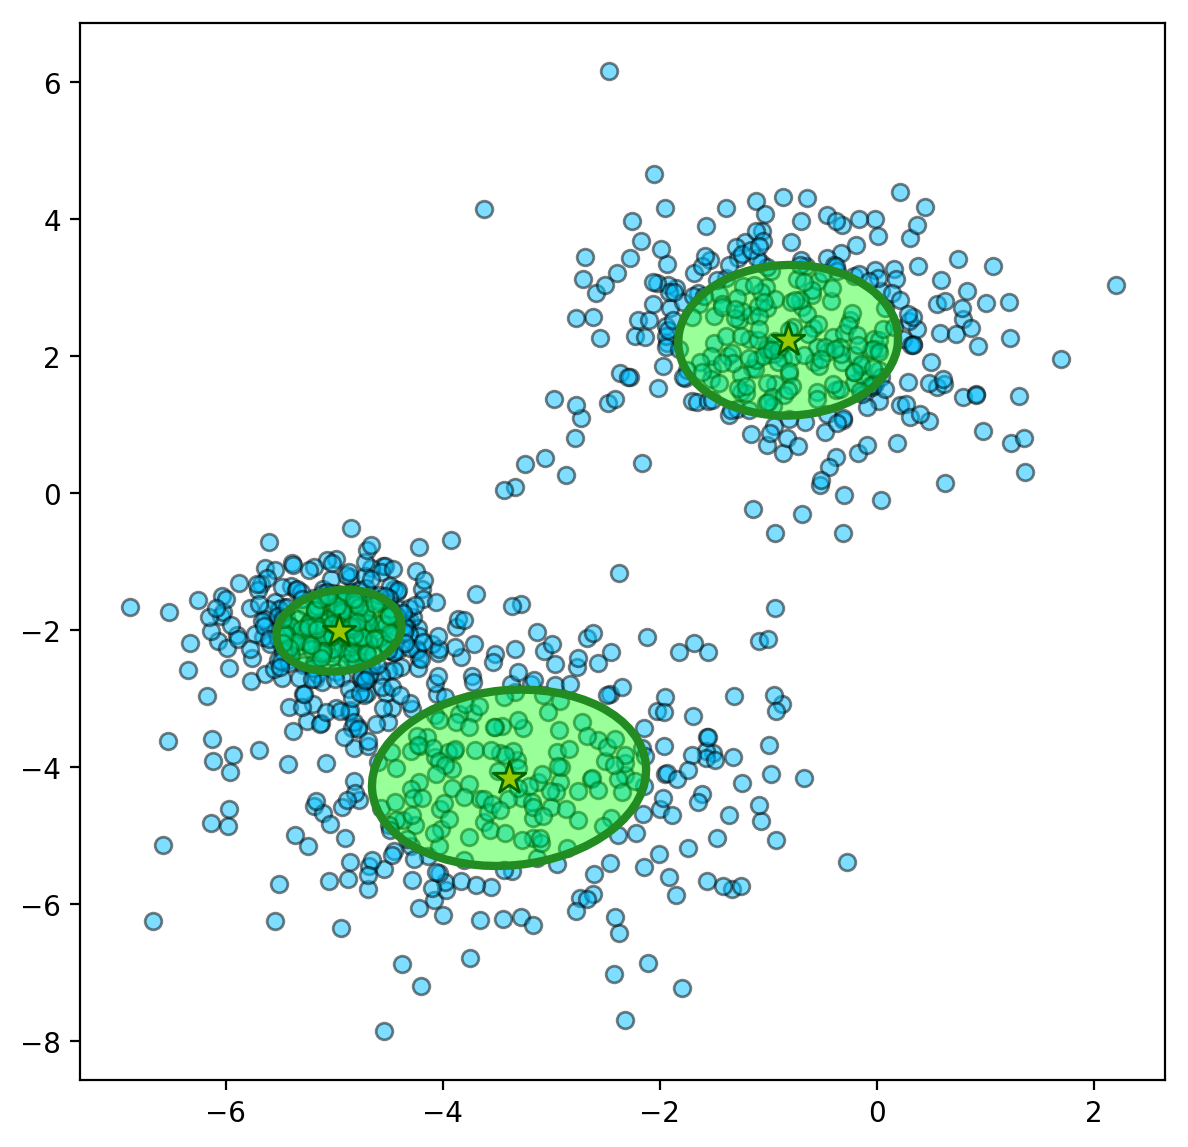

In [5]:
print(f'KL: {vgm.kl_divergence()}')
vgm.plot_with_ellipses()

## cluster number selection by kl divergence

## plotting

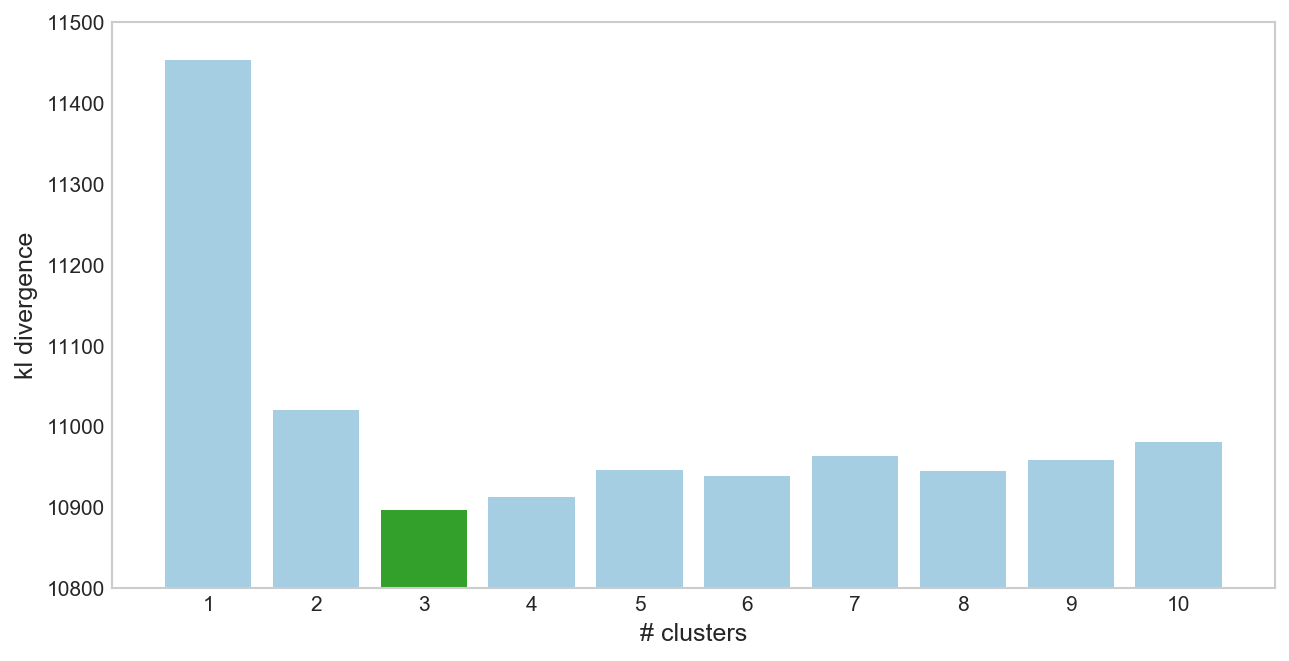

In [200]:
k_range = np.arange(1,10+1)
kls, argmin_k = cluster_number_selection_by_kl(k_range)
k_range_0 = k_range - 1
colors = plt.cm.Paired([0,3])

plt.figure(figsize=(10,5), dpi=150)
for k in k_range_0:
    g = 1 if k+1 == argmin_k else 0
    plt.bar(k, kls[k], color=colors[g])

plt.xticks(k_range_0, k_range)
plt.grid()
plt.ylim(10800,11500)
plt.ylabel('kl divergence', fontsize=12)
plt.xlabel('# clusters', fontsize=12)
plt.show()